In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection
import os

In [25]:
csv_path = 'data/'

start_time_step = 10
end_time_step = 3500
time_increment = 10

dfs = []

for step in range(start_time_step, end_time_step, time_increment):
    filepath = os.path.join(csv_path, f'export{step:02}.csv')
    temp_df = pd.read_csv(filepath, skiprows=5, header=0, names=['X', 'Y', 'Z', 'Absolute Pressure', 'Pressure', 'Velocity', 'Velocity u', 'Velocity v'])
    dfs.append(temp_df)
print(f"Loaded {len(dfs)} CSV files")

Loaded 349 CSV files


In [27]:
dfs[0]

,X,Y,Z,Absolute Pressure,Pressure,Velocity,Velocity u,Velocity v
0,7783.54102,1724.651610,24.982239,102847.367,1522.369870,297.979553,297.979370,-0.330401
1,7826.85889,1699.751590,24.982239,102531.477,1206.484380,297.948151,297.948029,-0.264339
2,7826.85498,1749.753540,24.982239,102549.180,1224.173100,298.020569,298.020447,-0.271470
3,7783.56055,1674.653560,24.982239,102823.844,1498.839970,297.906891,297.906738,-0.322364
4,7826.86670,1649.753170,24.982239,102511.898,1186.896850,297.876617,297.876495,-0.257720
...,...,...,...,...,...,...,...,...
19870,7691.69141,102.406456,24.982239,103054.688,1729.687870,296.496582,296.496582,-0.051848
19871,7749.07471,101.973633,24.982239,102752.969,1427.959350,296.483246,296.483246,-0.041011
19872,7801.04102,102.007385,24.982239,102490.289,1165.284300,296.501495,296.501495,-0.017425
19873,7853.14990,101.511055,24.982239,102224.523,899.518311,296.509705,296.509705,0.006316


In [28]:
# Get input from DF
x_coords = dfs[0].pop('X')
y_coords = dfs[0].pop('Y')

# Remove uneeded features from DF
dfs[0].pop('Z')

# Convert to x/y
x_data = np.vstack((x_coords.values, y_coords.values))
y_data = np.array(dfs[0].values).T

In [30]:
y_data

array([[ 1.02847367e+05,  1.02531477e+05,  1.02549180e+05, ...,
         1.02490289e+05,  1.02224523e+05,  1.01883422e+05],
       [ 1.52236987e+03,  1.20648438e+03,  1.22417310e+03, ...,
         1.16528430e+03,  8.99518311e+02,  5.58435303e+02],
       [ 2.97979553e+02,  2.97948151e+02,  2.98020569e+02, ...,
         2.96501495e+02,  2.96509705e+02,  2.96560486e+02],
       [ 2.97979370e+02,  2.97948029e+02,  2.98020447e+02, ...,
         2.96501495e+02,  2.96509705e+02,  2.96560486e+02],
       [-3.30400825e-01, -2.64339387e-01, -2.71470189e-01, ...,
        -1.74246188e-02,  6.31625205e-03,  2.14252435e-02]])

In [188]:
data = np.array(dfs)
for i in range(len(data)):
    #data[i][data[i] == " null"] = "0"
    data[i] = data[i].astype(float)

In [189]:
print(data[0])

[[ 7.78354102e+03  1.72465161e+03  2.49822388e+01 ...  2.97979553e+02
   2.97979370e+02 -3.30400825e-01]
 [ 7.82685889e+03  1.69975159e+03  2.49822388e+01 ...  2.97948151e+02
   2.97948029e+02 -2.64339387e-01]
 [ 7.82685498e+03  1.74975354e+03  2.49822388e+01 ...  2.98020569e+02
   2.98020447e+02 -2.71470189e-01]
 ...
 [ 7.80104102e+03  1.02007385e+02  2.49822388e+01 ...  2.96501495e+02
   2.96501495e+02 -1.74246188e-02]
 [ 7.85314990e+03  1.01511055e+02  2.49822388e+01 ...  2.96509705e+02
   2.96509705e+02  6.31625205e-03]
 [ 7.91164258e+03  1.01048424e+02  2.49822388e+01 ...  2.96560486e+02
   2.96560486e+02  2.14252435e-02]]


In [190]:
coords = []
values = []
for i in range(len(data)):
    colA = data[i][:, [0,1]]
    coords.append(colA)
    colB = data[i][:, [3,4,5,6,7]]
    values.append(colB)
coords = np.asarray(coords)
values = np.asarray(values)
coords = coords/1000
print(coords[0])

[[7.78354102 1.72465161]
 [7.82685889 1.69975159]
 [7.82685498 1.74975354]
 ...
 [7.80104102 0.10200739]
 [7.8531499  0.10151106]
 [7.91164258 0.10104842]]


[7.78354102 7.82685889 7.82685498 ... 7.80104102 7.8531499  7.91164258]
[7.78354102 7.82685889 7.82685498 ... 7.80104102 7.8531499  7.91164258]


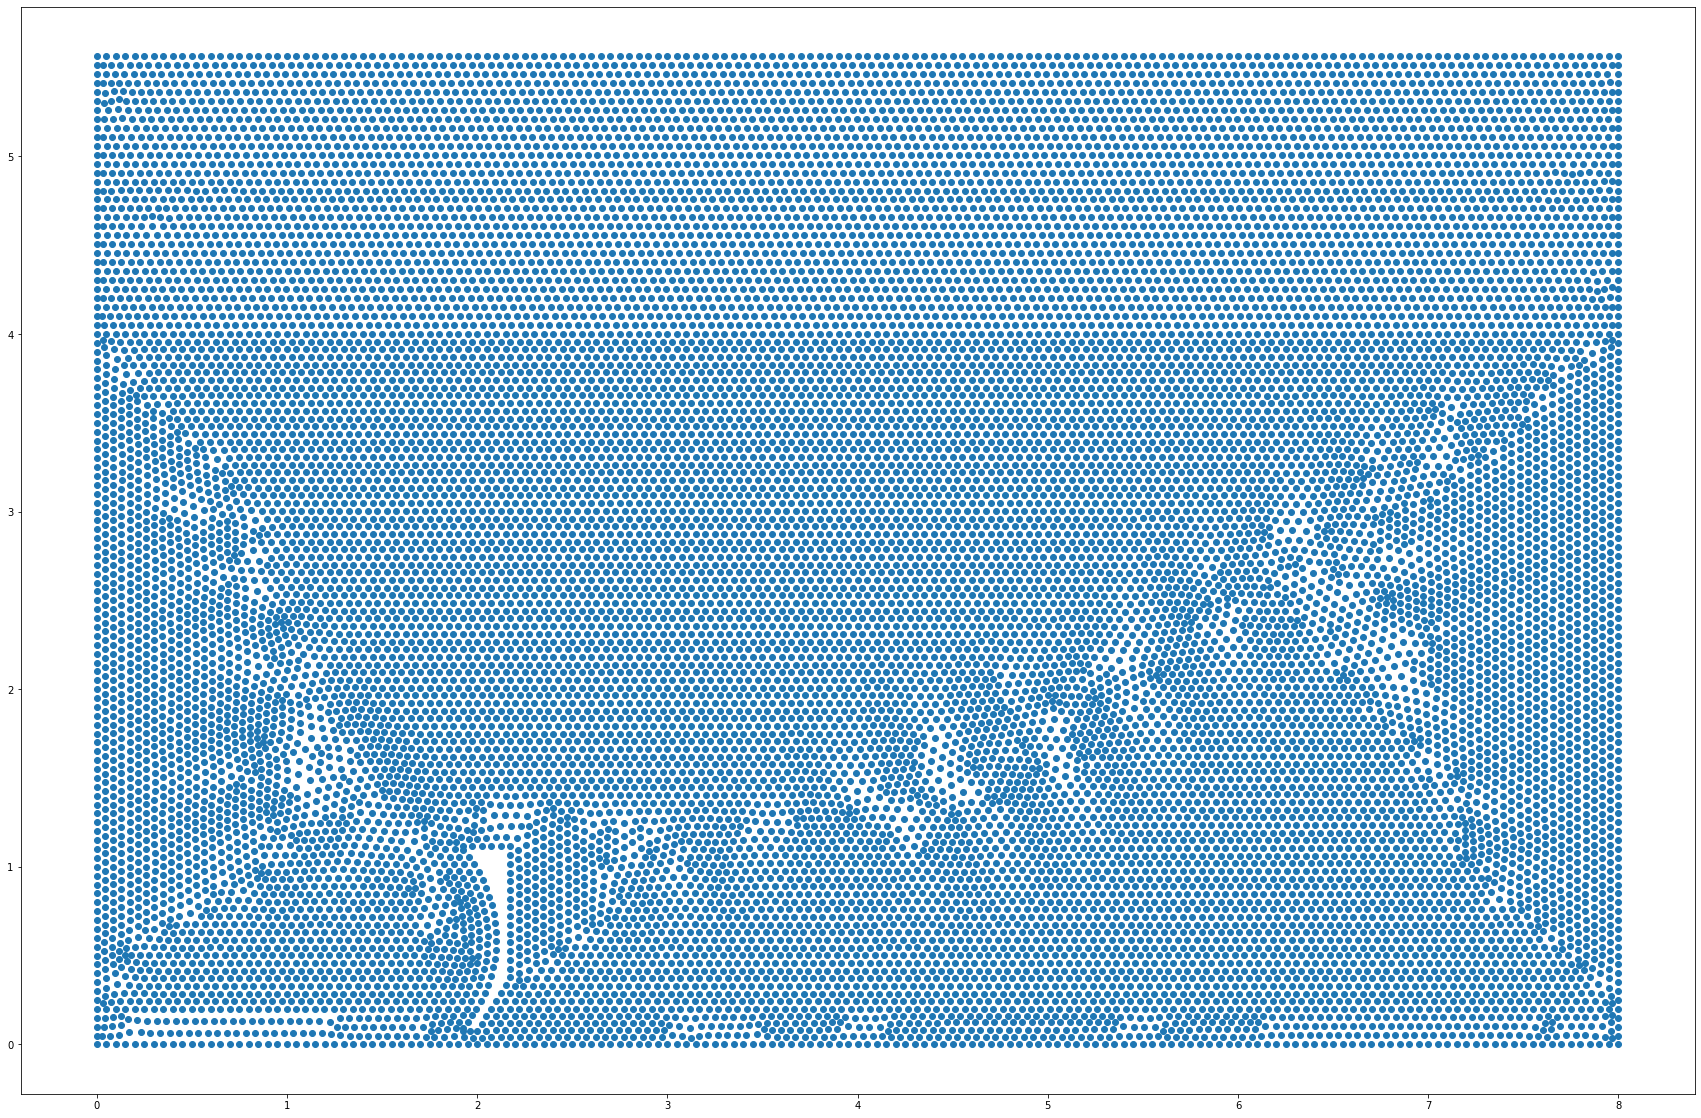

In [202]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(20)
print(coords[0,:,0])
print(coords[0,::1,0])
plt.scatter(coords[0,::1, 0],coords[0,::1, 1])#,markersize=1)
plt.show()

In [174]:
input_values = sn.Variable('input', units = 2)

In [175]:
scoopFields = sn.Field('output', units = 5)
output_values = sn.Functional(scoopFields, input_values, 3*[5], 'tanh')

In [176]:
model = sn.SciModel(
    inputs = input_values,
    targets = output_values,
    loss_func='mse'
)

In [177]:
#Load Weights if Available
#model.load_weights('airfoilFIVE10.hdf5')

In [178]:
history = model.train(
    coords,
    values,
    batch_size = 100,
    epochs = 1000,
    adaptive_weights = True
)
model.save_weights('scoopNN.hdf5')
#4 526 547 704
#3 364 207 388

Train on 6976125 samples

+ adaptive_weights at epoch 1: [1.0]
Epoch 1/1000
6976125/6976125 [==============================] - 64s 9us/sample - loss: 4526547704.2185 54s - loss: 4524750582 - ETA: 54s - loss: 4512866490. - ETA: 54s - loss: 4 - ETA: 53s - los - ET - ETA: 53s - - ETA: 24s - loss - ETA: 23s - loss: 4528730848.665 - ETA: 23s - loss: 452860138 - ETA: 23s - lo - ETA:  - ETA: 1s - los - ETA: 0s - loss:
Epoch 2/1000
6976125/6976125 [==============================] - 72s 10us/sample - loss: 4510214168.2473 - loss: 4510294 - ETA: 0s - loss: 451007837
Epoch 3/1000
6976125/6976125 [==============================] - 66s 9us/sample - loss: 4494010235.3629s - loss: 4494044445.62
Epoch 4/1000
6976125/6976125 [==============================] - 68s 10us/sample - loss: 4477933478.2869
Epoch 5/1000
6976125/6976125 [==============================] - 67s 10us/sample - loss: 4461980177.4868
Epoch 6/1000
6976125/6976125 [==============================] - 72s 10us/sample - loss: 4446147939.8294

6976125/6976125 [==============================] - 54s 8us/sample - loss: 4101650117.3222TA: 51s - lo - ETA: 45s - loss: 412365 - ETA: 45s - loss: 4124170204.69 - ETA: 35s - loss: 4108655081.399 - ETA: 35s - loss: 4108 - ETA: 35s - loss: 41082571 - ETA: 33s - loss: 4112544513.09 - ETA: 33s - loss: 41125 - ETA: 33s - loss: 4110941967.2 - ETA: 32s - loss - ETA: 23s - loss: 41002 - ETA: 22s - loss:  - ETA: 22s - loss: 4098097678 - ETA: 21s - loss: 4097940871 - ETA: 1 - ETA: 18s - loss: 4098220730.01 - ETA: 18s - loss: 40 - ETA: 17s - loss: 410059198 - ETA: 17s - loss: 4100 - ETA: 17s - loss - ETA: 16s - loss: 409867284 - ETA: 15s - ETA: 14s - loss: 4100254361.422  - ETA: 13s - loss: 41 - ETA: 12s - loss: 4104165910 - ETA - ETA: 9s - ETA: 7s - - ETA: 6s - loss: 41028 - ETA: 6s - loss: 4102628342.53 - ETA: 6s - loss: - E - ETA: 5s - loss: 41006 - ETA: 5s - loss: 41005 - ETA: 4s - loss: 4101288711.96 - ETA: 4s
Epoch 31/1000
6976125/6976125 [==============================] - 56s 8us/sample - 

6976125/6976125 [==============================] - 57s 8us/sample - loss: 3901415284.0612 48s - lo - ETA: 48s - loss: 390333335 - ETA: 48s - loss: 3906004 - ETA: 47s - loss: 3909 - ETA: - ETA: 45s - loss: 39225902 - ETA - ETA: 44s - loss: 391422807  - ETA: 42s - loss: 3911333 - ETA: 42s - loss:  - ETA: 41s - - ETA: 37s - loss - ETA: 34s - loss: 390294 - ETA: 33s  - ETA: 31s - loss: 3906306012.1 - ETA: 31s - loss: 390573 - ETA: 30s - los - ETA: 29s - loss: 390 - ETA: 28s - loss: 3907180578. - ETA: 28s - loss: 3907243930. - ETA: 28s - loss: 3907140515.152 - ETA - ETA:  - ETA: 24s - loss: 3903131676 - ETA: 24s - - ETA: 23s - loss: 390 - ETA: 22s - loss: 39 - ETA: 21s - loss: - ETA: 21s - loss: 3905435 - ETA: 20s - loss: 39077117 - ETA: 18s - loss: 3907983137.7 - ETA: 18s - loss: 3908587  - ETA: 15s - loss: 3909 - ETA: 15s - loss: 390 - ETA: 14s - loss: 3908325963.03 - ETA: 14s - loss: 3908 - E - ETA: 10s - loss: 3905492816 - ETA: 9s - los - ETA: 9s - loss: 390 - ETA: 3s - loss: 39036 -
Ep

6976125/6976125 [==============================] - 52s 7us/sample - loss: 3604155704.1008
Epoch 74/1000
6976125/6976125 [==============================] - 51s 7us/sample - loss: 3594089616.8213
Epoch 75/1000
6976125/6976125 [==============================] - ETA: 0s - loss: 3583928788.76 - 52s 7us/sample - loss: 3584090123.0842
Epoch 76/1000
6976125/6976125 [==============================] - 51s 7us/sample - loss: 3574159672.8361s - l - ETA: 0s - los
Epoch 77/1000
6976125/6976125 [==============================] - 51s 7us/sample - loss: 3564300287.9450 38s - loss: 3569720480 - ETA: 36s - loss: 3570567287 - ETA - ETA: 34s - loss:  - ETA: 33s - loss: 35691354 - ETA: 33s - loss: 3 - ETA: 31s - loss:  - ETA: 21s - - - ETA: 1s - loss: 3565624136.89 - ETA: 1s - loss: 356547735 - ETA: 1s - - ETA: 1s - loss: 356576496 - ETA: 1s - los - ETA: 0s - loss: - ETA: 0s - loss: 356
Epoch 78/1000
6976125/6976125 [==============================] - 52s 7us/sample - loss: 3554500365.0392
Epoch 79/1000
6976

6976125/6976125 [==============================] - 66s 9us/sample - loss: 3372627323.4950- ETA: 13s - loss: 3370822267 - ETA: 13s - loss:  - ETA: 12s - los - ETA: 0s - l
Epoch 99/1000
6976125/6976125 [==============================] - ETA: 0s - loss: 3364207388.6491 - ETA: 47s - loss: - ETA:  - ETA: 37s - ETA: 36s -  - ETA: 36s - loss: 33663676 - ETA: 35s - ETA: 34s - loss - 60s 9us/sample - loss: 3364232818.5594
Epoch 100/1000
2475800/6976125 [=========>....................] - ETA: 40s - loss: 3354732891.4736-  - ETA: 41s - loss: 3357016550 - ETA: 41s - loss: 3354702280

KeyboardInterrupt: 

In [10]:
model.load_weights('airfoil_v2_Complete.hdf5')
# Performance
#loss = history.history['loss']
#y_loss = history.history['y_loss']

#print('Lowest training loss = {:9.6f}, in epoch {} '.format(np.amin(loss),np.argmin(loss)+1))
#print('Lowest training y_loss = {:9.6f}, in epoch {} '.format(np.amin(y_loss),np.argmin(y_loss)+1))

#fig, ax = plt.subplots()
#ax.plot(loss, label = 'loss')
#ax.plot(y_loss, label = 'y_loss')
#ax.set_title('Training Losses')
#ax.legend(loc='upper right')

In [11]:
#x_test, y_test
prediction = output_values.eval(model, x_test) 
# Testing new data
#Bot_Xtr_pred, Top_Xtr_pred = np.hsplit(prediction, 2)
Top_Xtr_pred, Bot_Xtr_pred = np.hsplit(prediction, 2)
Top_Xtr_true, Bot_Xtr_true = np.hsplit(y_test, 2)

errTop = (Top_Xtr_true-Top_Xtr_pred)**2
errBot = (Bot_Xtr_true-Bot_Xtr_pred)**2

print(np.average(errTop))
print(np.average(errBot))

#print(np.min(errTop))
#print(np.min(errBot))

#loss_value = model.loss_function#(Top_Xtr_true,Top_Xtr_pred)

Input and output dimensions need re-adjustment for post-processing.
0.1333623414276178
0.1850786202154771


Lowest training loss =  0.159121, in epoch 966 


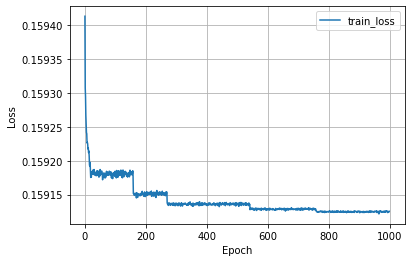

In [36]:
print('Lowest training loss = {:9.6f}, in epoch {} '.format(np.amin(history.history['loss']),np.argmin(history.history['loss'])+1))
#print('Lowest validation loss = {:9.6f}, in epoch {} '.format(np.amin(history.history['val_loss']),np.argmin(history.history['val_loss'])+1))
#print(history.history)
#lr
# Plot training and validation loss in the same plot
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
#plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
 
# Evaluate test set
#print('Test set loss = ', model.loss_function(x_test, y_test))